In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../readmaroc')

In [3]:
from maroc_data import MarocData

In [4]:
from scipy.stats import norm

In [5]:
input_dat = '../data/0806/Run000092044.dat'

In [6]:
marocdata = MarocData(input_dat)

In [7]:
marocdata.active_boards

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [8]:
y_offset = [12000, 10000, 8000, 4000, 2000]

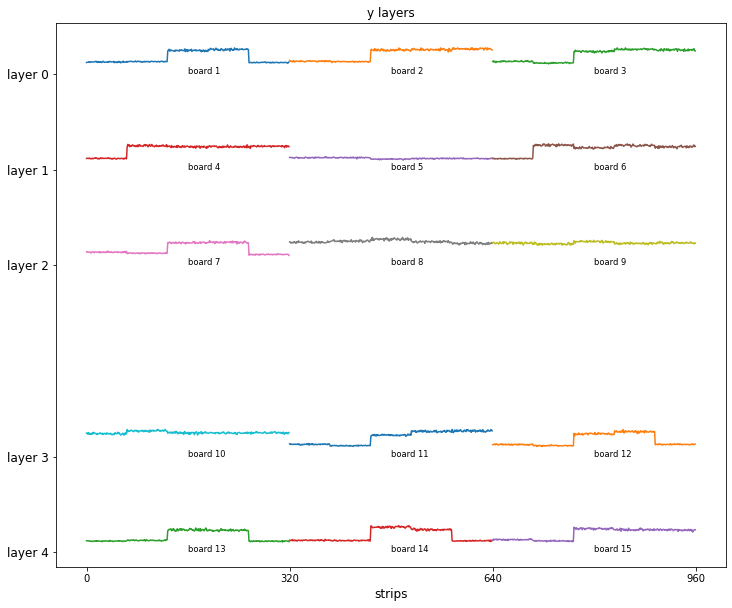

In [9]:
plt.figure(figsize=(12,10))
for i, triplet in enumerate(np.arange(1,16).reshape(5,3)):
    for j, board in enumerate(triplet):
        if board in marocdata.active_boards:
            plt.plot(np.arange(0+(j*320), 320+320*j), 
                     (marocdata.get_board(board).get_event(53).signal)+y_offset[i])
        plt.text((320+320*j-0+(j*320))/2, y_offset[i], 'board {}'.format(board), size='small'
                )

plt.title('y layers')
plt.yticks(y_offset, ['layer 0','layer 1', 'layer 2', 'layer 3', 'layer 4'], size='large')
plt.xticks([0, 320, 640, 960])
plt.xlabel('strips', size='large')
plt.show()

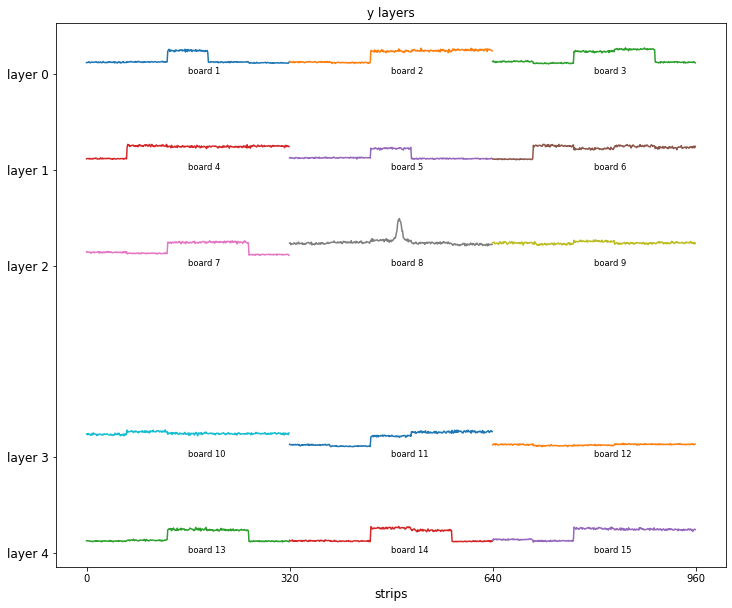

In [57]:
plt.figure(figsize=(12,10))
for i, triplet in enumerate(np.arange(1,16).reshape(5,3)):
    for j, board in enumerate(triplet):
        if board in marocdata.active_boards:
            plt.plot(np.arange(0+(j*320), 320+320*j), 
                     (marocdata.get_board(board).get_event(584).signal)+y_offset[i])
        plt.text((320+320*j-0+(j*320))/2, y_offset[i], 'board {}'.format(board), size='small'
                )
plt.title('y layers')
plt.yticks(y_offset, ['layer 0','layer 1', 'layer 2', 'layer 3', 'layer 4'], size='large')
plt.xticks([0, 320, 640, 960])
plt.xlabel('strips', size='large')
plt.show()

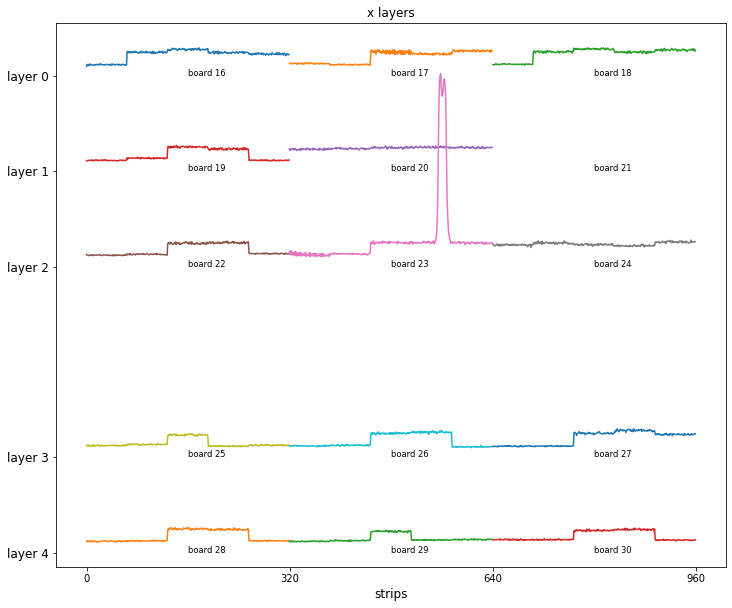

In [17]:
plt.figure(figsize=(12,10))
for i, triplet in enumerate(np.arange(16,31).reshape(5,3)):
    for j, board in enumerate(triplet):
        if board in marocdata.active_boards:
            plt.plot(np.arange(0+(j*320), 320+320*j), 
                     (marocdata.get_board(board).get_event(53).signal)+y_offset[i])
        plt.text((320+320*j-0+(j*320))/2, y_offset[i], 'board {}'.format(board), size='small'
                )
plt.title('x layers')
plt.yticks(y_offset, ['layer 0','layer 1', 'layer 2', 'layer 3', 'layer 4'], size='large')
plt.xticks([0, 320, 640, 960])
plt.xlabel('strips', size='large')
plt.show()

In [11]:
marocdata.max_evt

1204

In [56]:
colors = ['red', 'blue', 'k', 'magenta', 'orange']
for evt in range(1,21):
    allboards_evt = marocdata.get_event(evt)
    for board, event_board in allboards_evt:
        if board in marocdata.active_boards:
            print(evt, board)
            signal = event_board.signal
            noise = marocdata.get_board(board).noise
            mu, std = norm.fit(noise)
            pedestal = marocdata.get_board(board).avg_data
            if np.any(signal-pedestal>30+(mu+5*std)):
                plt.figure(figsize=(15,12))
                for i, triplet in enumerate(np.arange(1,16).reshape(5,3)):
                    for j, board in enumerate(triplet):
                        if evt in marocdata.get_board(board):
                            board_data = marocdata.get_board(board)
                            signal= board_data.get_event(evt).signal
                            plt.plot(np.arange(0+(j*320), 320+320*j), 
                                     signal+y_offset[i], c=colors[evt//5], linewidth=.7)
                            plt.text((320+320*j-0+(j*320))/2, y_offset[i], 'board {}'.format(board), size='medium')
                plt.title('y layers')
                plt.yticks(y_offset, ['layer 0','layer 1', 'layer 2', 'layer 3', 'layer 4'], size='large')
                plt.xticks([0, 320, 640, 960])
                plt.xlabel('strips', size='large')
                plt.show()

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8


KeyboardInterrupt: 